In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
train_df = pd.read_csv("../input/train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.drop('Cabin',axis=1,inplace=True)

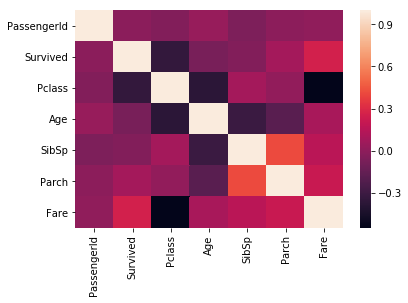

In [5]:
sns.heatmap(train_df.corr())

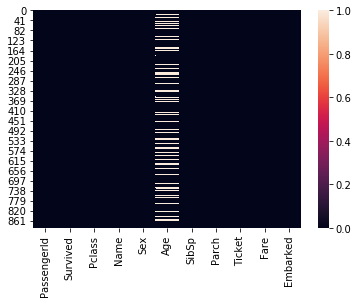

In [6]:
sns.heatmap(train_df.isnull())

In [7]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [9]:
def settle_age(l):
    age,pclass = l
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        else:
            return 25
    else:
        return age

In [10]:
train_df['Age']=train_df[['Age','Pclass']].apply(settle_age,axis=1)

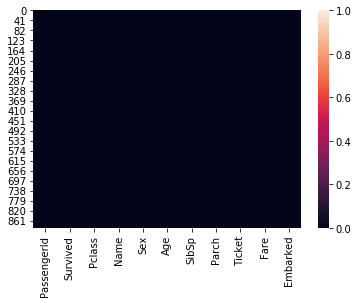

In [11]:
sns.heatmap(train_df.isnull())

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
train_df['Sex']=pd.get_dummies(train_df['Sex'],drop_first=True)

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [15]:
train_df.drop(['Name','PassengerId'],axis=1,inplace=True)

In [16]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [17]:
train_df.drop(['Ticket','Fare','Parch'],axis=1,inplace=True)

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,1,22.0,1,S
1,1,1,0,38.0,1,C
2,1,3,0,26.0,0,S
3,1,1,0,35.0,1,S
4,0,3,1,35.0,0,S


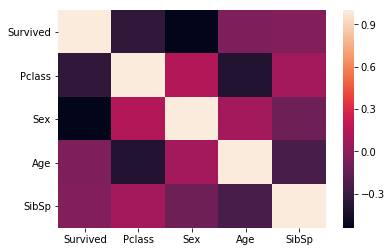

In [19]:
sns.heatmap(train_df.corr())

In [20]:
e=pd.get_dummies(train_df['Embarked'],drop_first=True)

In [21]:
e.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
train_df['Q'],train_df['S']=e['Q'],e['S']

In [23]:
train_df.drop(['Age','Embarked'],axis=1,inplace=True)

In [24]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Q,S
0,0,3,1,1,0,1
1,1,1,0,1,0,0
2,1,3,0,0,0,1
3,1,1,0,1,0,1
4,0,3,1,0,0,1


In [25]:
train_df.drop('SibSp',axis=1,inplace=True)

In [26]:
train_df.head()

,Survived,Pclass,Sex,Q,S
0,0,3,1,0,1
1,1,1,0,0,0
2,1,3,0,0,1
3,1,1,0,0,1
4,0,3,1,0,1


In [27]:
train_df.corr()

,Survived,Pclass,Sex,Q,S
Survived,1.000000,-0.338481,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,-0.074115,0.125722
Q,0.003650,0.221009,-0.074115,1.000000,-0.496624
S,-0.155660,0.081720,0.125722,-0.496624,1.000000


In [28]:
train_df.drop('Q',axis=1,inplace=True)

In [29]:
train_df.head()

,Survived,Pclass,Sex,S
0,0,3,1,1
1,1,1,0,0
2,1,3,0,1
3,1,1,0,1
4,0,3,1,1


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(train_df.drop('Survived',axis=1),train_df['Survived'],test_size=0.3)

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
classifier = GaussianNB()

In [34]:
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,
cm = confusion_matrix(y_test,y_pred)

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-36-68da92feadbd>, line 1)

In [37]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)

In [38]:
print("Report :")
print(cr)

Report :
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       159
           1       0.73      0.71      0.72       109

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

